In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def convert_xpt_to_csv(xpt_file: str, csv_file: str):
    """
    Converts an XPT (SAS transport file) to a CSV file.

    Parameters:
    xpt_file (str): Path to the input XPT file.
    csv_file (str): Path to save the output CSV file.
    """
    try:
        # Read the XPT file
        df = pd.read_sas(xpt_file, format="xport")
        
        # Save to CSV
        df.to_csv(csv_file, index=False)
        
        print(f"Conversion complete! CSV file saved at: {csv_file}")
    except Exception as e:
        print(f"Error: {e}")

### from chatGPT

August 2021-August 2023 Dietary Data - Continuous NHANES
Dietary Interview - Total Nutrient Intakes, First Day
*https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DR1TOT_L.htm

In [11]:
### Dietary DATA
convert_xpt_to_csv("DR1TOT_L.xpt", "DR1TOT_L.csv")

Conversion complete! CSV file saved at: DR1TOT_L.csv


August 2021-August 2023 Laboratory Data - Continuous NHANES

**Glycohemoglobin** A1C Test

*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&Cycle=2021-2023

In [22]:
#convert_xpt_to_csv("GHB_L.xpt", "GHB_L.csv")

##cleaning GHB_L A1C test results
GHB_L = pd.read_csv('GHB_L.csv')
#GHB_L

## dropping WTPH2YR 
GHB_L = GHB_L.drop('WTPH2YR', axis=1)
GHB_L
## count null

#GHB_L['LBXGH'].isnull().sum(axis = 0)
## 484 similar to documentation

GHB_L = GHB_L.dropna()
GHB_L['LBXGH'].isnull().sum(axis = 0)
# null count = 0

0

In [94]:
##creating column where A1C > 6.4 (6.5 gets you diagnosed with diabetes)
GHB_L['DIAB_POS'] = np.where(GHB_L['LBXGH'] > 6.4, '1', '0')
count_positive = GHB_L['DIAB_POS'].value_counts()
count_positive
## 721 respondents are positive with diabetes

DIAB_POS
0    5994
1     721
Name: count, dtype: int64

**Plasma Fasting Glucose**

PFG test

PFG >= 126 m/dL -> Diabetes Diagnosis

*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&Cycle=2021-2023

In [56]:
#convert_xpt_to_csv("GLU_L.xpt", "GLU_L.csv")
#CLEANING GLU_L.CSV
GLU_L = pd.read_csv('GLU_L.csv')

##3 dropping WTSAF2YR, LBDGLUSI (PFG in SI units)
GLU_L = GLU_L.drop(['WTSAF2YR', 'LBDGLUSI'], axis=1)

## count null
GLU_L['LBXGLU'].isnull().sum(axis = 0)
## 324 similar to documentation

GLU_L = GLU_L.dropna()
# GLU_L['LBXGLU'].isnull().sum(axis = 0)
# null count = 0

In [92]:
##creating column where PFG > 126
GLU_L['DIAB_POS'] = np.where(GLU_L['LBXGLU'] > 125, '1', '0')
count_positive = GLU_L['DIAB_POS'].value_counts()
count_positive
## 430

DIAB_POS
0    3242
1     430
Name: count, dtype: int64

In [60]:
GLU_L


,SEQN,LBXGLU,DIAB_POS
0,130378.0,113.0,0
1,130379.0,99.0,0
2,130380.0,156.0,1
3,130386.0,100.0,0
4,130394.0,88.0,0
...,...,...,...
3990,142300.0,95.0,0
3991,142301.0,110.0,0
3992,142303.0,160.0,1
3993,142305.0,132.0,1


Vitamin D
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&Cycle=2021-2023

In [18]:
convert_xpt_to_csv("VID_L.xpt", "VID_L.csv")

Conversion complete! CSV file saved at: VID_L.csv


August 2021-August 2023 Examination Data - Continuous NHANES
Blood Pressure - Oscillometric Measurements
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2021-2023

In [20]:
convert_xpt_to_csv("BPXO_L.xpt", "BPXO_L.csv")

Conversion complete! CSV file saved at: BPXO_L.csv


Body Measures
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2021-2023

In [26]:
#convert_xpt_to_csv("BMX_L.xpt", "BMX_L.csv")
#CLEANING GLU_L.CSV
BMX_L = pd.read_csv('BMX_L.csv')
#BMX_L
#we are interested in only and SEQN BMXBMI
BMX_L = BMX_L[['SEQN', 'BMXBMI', 'BMXWAIST']]
BMX_L

## count null
#BMX_L['BMXBMI'].isnull().sum(axis = 0)
# null count =  389

BMX_L = BMX_L.dropna()
BMX_L['BMXBMI'].isnull().sum(axis = 0)
# null count = 0
BMX_L

,SEQN,BMXBMI,BMXWAIST
0,130378.0,27.0,98.3
1,130379.0,33.5,114.7
2,130380.0,29.7,93.5
3,130381.0,23.8,70.4
5,130386.0,30.2,106.1
...,...,...,...
8854,142305.0,26.4,89.0
8855,142306.0,15.4,57.7
8857,142308.0,26.4,98.4
8858,142309.0,25.5,96.0


C:\Users\trash\AppData\Local\Temp\ipykernel_24436\1758271486.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


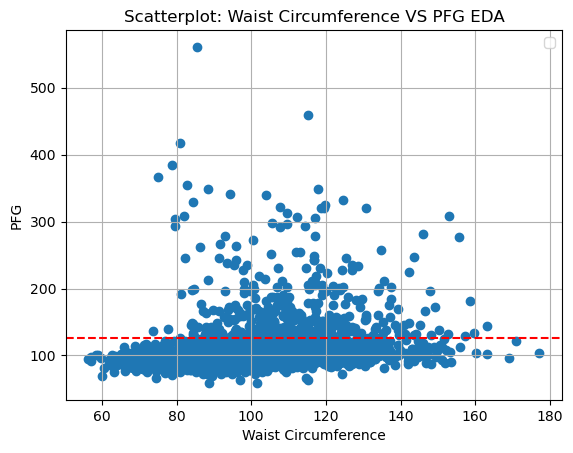

In [86]:
### EDA BMI WAIST VS LBXGLU we should see a positive correlation

BMI_LBXGLU = pd.merge(GLU_L, BMX_L, how='inner')
BMI_LBXGLU

plt.scatter(BMI_LBXGLU.BMXWAIST, BMI_LBXGLU.LBXGLU)

# Add labels and title
plt.xlabel('Waist Circumference')
plt.ylabel('PFG')
plt.title('Scatterplot: Waist Circumference VS PFG EDA')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.axhline(y = 126, color = 'r', linestyle = '--') 
plt.savefig('Scatterplot_Waist_circumference_vs_Diabetes_EDA.png', dpi=300)

# Show the plot
plt.show();

## data might be dirty

In [28]:
plt.scatter(BMI_LBXGLU.BMXBMI, BMI_LBXGLU.DIAB_POS)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('PFG')
plt.title('BMI VS DIABETES-PFG EDA')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.savefig('Waist_circumference_vs_Diabetes_EDA.png', dpi=300)

# Show the plot
plt.show();

NameError: name 'BMI_LBXGLU' is not defined

C:\Users\trash\AppData\Local\Temp\ipykernel_24436\1636963836.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


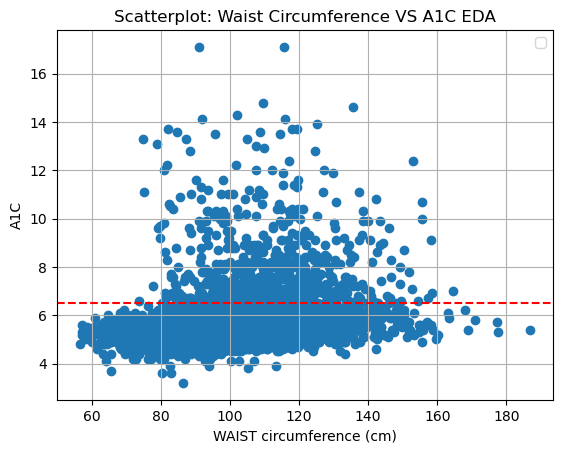

In [84]:
### EDA BMXWAIST VS LBXGH we should see a positive correlation

BMI_LBXGH = pd.merge(GHB_L, BMX_L, how='inner')
BMI_LBXGH

plt.scatter(BMI_LBXGH.BMXWAIST, BMI_LBXGH.LBXGH)

# Add labels and title
plt.xlabel('WAIST circumference (cm)')
plt.ylabel('A1C')
plt.title('Scatterplot: Waist Circumference VS A1C EDA')
plt.axhline(y = 6.5, color = 'r', linestyle = '--') 
# Add grid and legend
plt.grid(True)
plt.legend()
plt.savefig('Waist_circumference_vs_Diabetes_A1c_EDA.png', dpi=300)
# Show the plot
plt.show();


In [50]:
BMI_LBXGH

,SEQN,LBXGH,DIAB_POS,BMXBMI,BMXWAIST
0,130378.0,5.6,0,27.0,98.3
1,130379.0,5.6,0,33.5,114.7
2,130380.0,6.2,0,29.7,93.5
3,130386.0,5.1,0,30.2,106.1
4,130387.0,5.9,0,42.6,122.0
...,...,...,...,...,...
6394,142302.0,5.2,0,21.4,79.7
6395,142303.0,8.1,1,27.9,111.0
6396,142305.0,6.0,0,26.4,89.0
6397,142309.0,5.2,0,25.5,96.0


In [46]:
## dummy variable diab_pos using a1c test
plt.scatter(BMI_LBXGH.BMXBMI, BMI_LBXGH.DIAB_POS)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('PFG')
plt.title('BMI VS DIABETES-PFG EDA')

# Add grid and legend
plt.grid(True)
plt.legend()
plt.savefig('BMI_Diabetes_EDA.png', dpi=300)

# Show the plot
plt.show();

,SEQN,LBXGH,DIAB_POS,BMXBMI,BMXWAIST
0,130378.0,5.6,0,27.0,98.3
1,130379.0,5.6,0,33.5,114.7
2,130380.0,6.2,0,29.7,93.5
3,130386.0,5.1,0,30.2,106.1
4,130387.0,5.9,0,42.6,122.0
...,...,...,...,...,...
6394,142302.0,5.2,0,21.4,79.7
6395,142303.0,8.1,1,27.9,111.0
6396,142305.0,6.0,0,26.4,89.0
6397,142309.0,5.2,0,25.5,96.0


DIAB_POS
0    3242
1     430
Name: count, dtype: int64

August 2021-August 2023 Questionnaire Data - Continuous NHANES
Diabetes
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023

In [28]:
convert_xpt_to_csv("DIQ_L.xpt", "DIQ_L.csv")

Conversion complete! CSV file saved at: DIQ_L.csv


Alcohol Use
https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023

In [30]:
convert_xpt_to_csv("ALQ_L.xpt", "ALQ_L.csv")

Conversion complete! CSV file saved at: ALQ_L.csv


Physical Activity
https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023




In [32]:
#convert_xpt_to_csv("PAQ_L.xpt", "PAQ_L.csv")



Conversion complete! CSV file saved at: PAQ_L.csv


Smoking - Cigarette Use
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023

In [34]:
convert_xpt_to_csv("SMQ_L.xpt", "SMQ_L.csv")

Conversion complete! CSV file saved at: SMQ_L.csv


Mental Health - Depression Screener
*https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023

In [36]:
convert_xpt_to_csv("DPQ_L.xpt", "DPQ_L.csv")

Conversion complete! CSV file saved at: DPQ_L.csv


In [88]:
BMI_LBXGLU

,SEQN,LBXGLU,DIAB_POS,BMXBMI,BMXWAIST
0,130378.0,113.0,0,27.0,98.3
1,130379.0,99.0,0,33.5,114.7
2,130380.0,156.0,1,29.7,93.5
3,130386.0,100.0,0,30.2,106.1
4,130394.0,88.0,0,24.4,92.1
...,...,...,...,...,...
3493,142299.0,204.0,1,35.7,121.8
3494,142300.0,95.0,0,32.6,97.6
3495,142303.0,160.0,1,27.9,111.0
3496,142305.0,132.0,1,26.4,89.0
